In [3]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [4]:
import joblib

sys.modules['sklearn.externals.joblib'] = joblib

In [5]:
import pandas as pd
import numpy as np
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots
from pmdarima import ARIMA                              # for determining ARIMA orders


# Load a non-stationary dataset
df1 = pd.read_csv('tempandq1.csv',index_col='date',parse_dates=True)
df1.index.freq = 'D'

In [6]:
from pmdarima import auto_arima

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

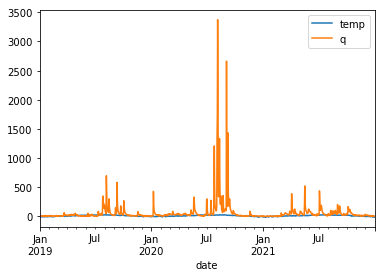

In [7]:
df1.plot()

In [9]:
from pmdarima import auto_arima

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [10]:
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA, ETS

In [11]:
len(df1)

1096

In [12]:
# Set one year for testing
train = df1.iloc[:822]
test = df1.iloc[822:]

In [13]:
test.head(2)

,temp,q
date,,
2021-04-02,13.2,38.120
2021-04-03,10.5,78.457


In [14]:
train.shape

(822, 2)

In [15]:
test.shape

(274, 2)

In [16]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose

In [31]:
model2= SARIMAX(train['q'],order=(2,0,3),seasonal_order=(0,0,2,7),enforce_invertibility=False)
results = model2.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                      q   No. Observations:                  822
Model:             SARIMAX(2, 0, 3)x(0, 0, [1, 2], 7)   Log Likelihood               -5309.245
Date:                                Wed, 28 Sep 2022   AIC                          10634.490
Time:                                        14:12:35   BIC                          10672.184
Sample:                                    01-01-2019   HQIC                         10648.952
                                         - 04-01-2021                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4178      0.062      6.779      0.000       0.297       0.539
ar.L2          0.5295      0.048     11.036      0.000       0.435       0.624
ma.L1          0.2775      0.066      4.196      0.000       0.148       0.407
ma.L2         -0.4087      0.020    -19.983      0.000      -0.449      -0.369
ma.L3         -0.4151      0.020    -21.157      0.000      -0.454      -0.377
ma.S.L7       -0.0638      0.023     -2.833      0.005      -0.108      -0.020
ma.S.L14      -0.0800      0.045     -1.779      0.075      -0.168       0.008
sigma2      2.382e+04    265.407     89.766      0.000    2.33e+04    2.43e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):            724373.06
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):              18.85   Skew:                             9.07
Prob(H) (two-sided):                  0.00   Kurtosis:                       147.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [32]:
exog_forecast = df1[822:][['q']]
fcast = results.predict(len(train),len(train)+273,exog=exog_forecast).rename('SARIMAX(2,0,3)(0,0,2,7) Forecast')

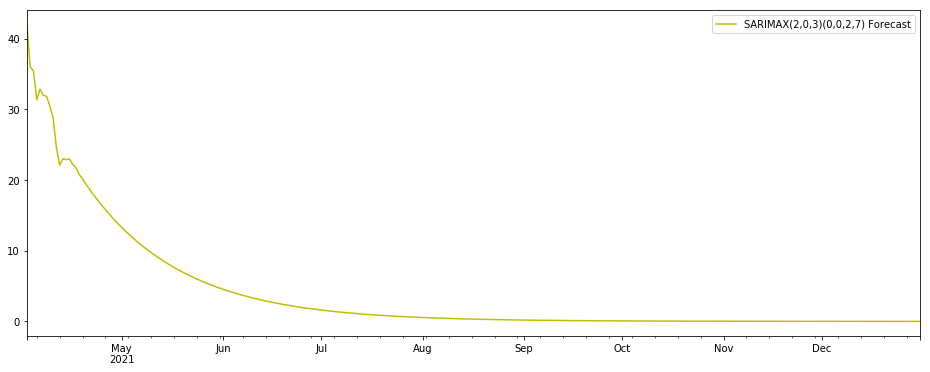

In [19]:
fcast.plot(legend=True,figsize=(16,6),c='y')

In [34]:
fcast.to_csv("fcast.csv", index=False)

In [35]:
fcast

2021-04-02    41.976317
2021-04-03    36.030794
2021-04-04    35.447794
2021-04-05    31.380866
2021-04-06    32.900915
                ...    
2021-12-27     0.003253
2021-12-28     0.003142
2021-12-29     0.003035
2021-12-30     0.002932
2021-12-31     0.002832
Freq: D, Name: SARIMAX(2,0,3)(0,0,2,7) Forecast, Length: 274, dtype: float64

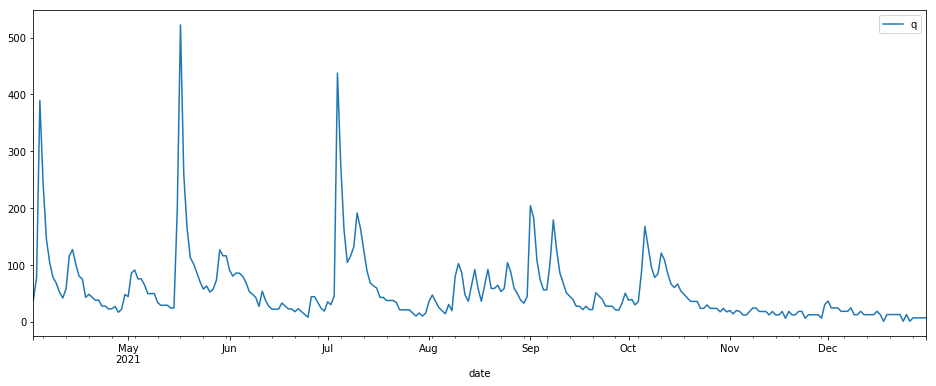

In [38]:
test['q'].plot(legend=True,figsize=(16,6))

In [39]:
test.to_csv("test.csv", index=False)

In [40]:
test

,temp,q
date,,
2021-04-02,13.2,38.120
2021-04-03,10.5,78.457
2021-04-04,7.1,389.262
2021-04-05,7.7,242.339
2021-04-06,10.9,145.385
...,...,...
2021-12-27,-9.7,6.911
2021-12-28,-4.2,6.943
2021-12-29,0.3,6.961


In [22]:
model2

In [23]:
results = model2.fit()

In [24]:
pred_y=results.forecast()

In [25]:
pred_y

2021-04-02    41.976317
Freq: D, dtype: float64

In [26]:
test_y=test['q']

In [27]:
test_y

date
2021-04-02     38.120
2021-04-03     78.457
2021-04-04    389.262
2021-04-05    242.339
2021-04-06    145.385
               ...   
2021-12-27      6.911
2021-12-28      6.943
2021-12-29      6.961
2021-12-30      6.997
2021-12-31      7.022
Freq: D, Name: q, Length: 274, dtype: float64

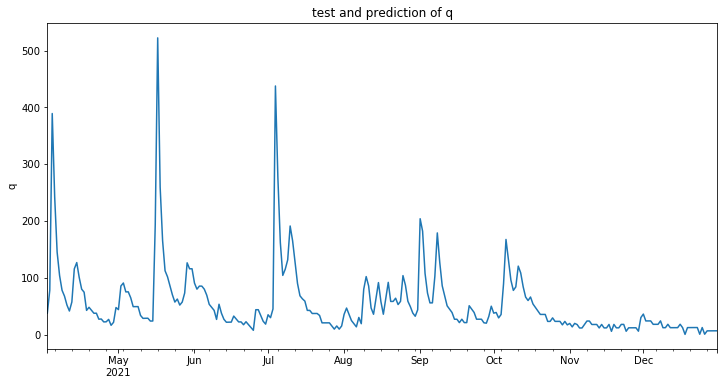

In [28]:
# Plot predictions against known values
title = 'test and prediction of q'
ylabel='q'
xlabel=''

ax = test_y.plot(legend=False,figsize=(12,6),title=title)
pred_y.plot(legend=False)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

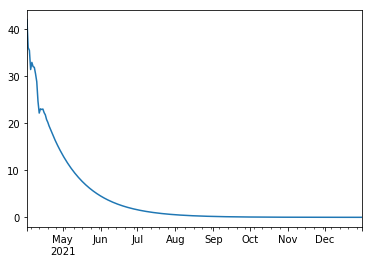

In [33]:
fcast.plot(legend=False)

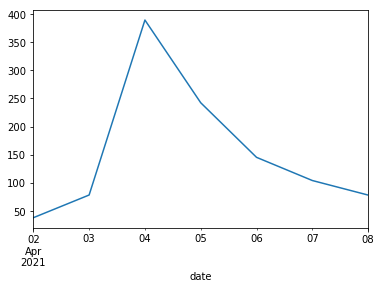

In [60]:
test_y2.plot(legend=False)

In [48]:
from sklearn.metrics import mean_squared_error

In [40]:
from math import sqrt

In [82]:
pred_y=results.forecast(steps=3)
test_y=test[0:3]
pred_y

2021-04-02    41.985174
2021-04-03    36.045099
2021-04-04    35.464381
Freq: D, Name: predicted_mean, dtype: float64

In [83]:
test_y

,temp,q
date,,
2021-04-02,13.2,38.120
2021-04-03,10.5,78.457
2021-04-04,7.1,389.262


In [84]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test_y['q'], pred_y)
print(f'SARIMA(0,1,3)(1,0,1,12) MSE Error: {error:11.10}')

SARIMA(0,1,3)(1,0,1,12) MSE Error: 42328.82129


In [85]:
from statsmodels.tools.eval_measures import rmse

error = rmse(test_y['q'], pred_y)
print(f'SARIMA(0,1,3)(1,0,1,12) RMSE Error: {error:11.10}')

SARIMA(0,1,3)(1,0,1,12) RMSE Error:  205.739693


In [86]:
pred_y2=results.forecast(steps=7)
test_y2=test[0:7]

In [88]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test_y2['q'], pred_y2)
print(f'SARIMA(0,1,3)(1,0,1,12) MSE Error: {error:11.10}')

SARIMA(0,1,3)(1,0,1,12) MSE Error: 27356.99713


In [89]:
from statsmodels.tools.eval_measures import rmse

error = rmse(test_y2['q'], pred_y2)
print(f'SARIMA(0,1,3)(1,0,1,12) RMSE Error: {error:11.10}')

SARIMA(0,1,3)(1,0,1,12) RMSE Error: 165.3995077


In [90]:
pred_y3=results.forecast(steps=30)
test_y3=test[0:30]

In [91]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test_y3['q'], pred_y3)
print(f'SARIMA(0,1,3)(1,0,1,12) MSE Error: {error:11.10}')

SARIMA(0,1,3)(1,0,1,12) MSE Error: 7731.824457


In [92]:
from statsmodels.tools.eval_measures import rmse

error = rmse(test_y3['q'], pred_y3)
print(f'SARIMA(0,1,3)(1,0,1,12) RMSE Error: {error:11.10}')

SARIMA(0,1,3)(1,0,1,12) RMSE Error: 87.93079357
